In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# I cropped out each stereo image into its own file.
# You'll have to download the images to run this for yourself
octo_front = cv2.imread('images/Octopus_Far_Front.jpg')
octo_offset = cv2.imread('images/Octopus_Far_Offset.jpg')

def show_rgb_img(img):
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

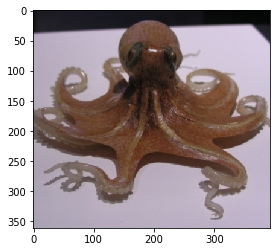

In [2]:
show_rgb_img(octo_front);

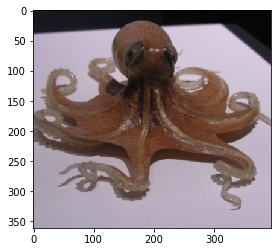

In [3]:

show_rgb_img(octo_offset);

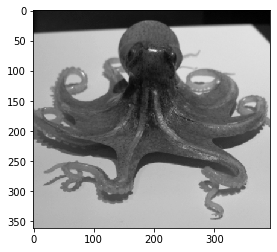

In [4]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

octo_front_gray = to_gray(octo_front)
octo_offset_gray = to_gray(octo_offset)

plt.imshow(octo_front_gray, cmap='gray');

In [ ]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

octo_front_kp, octo_front_desc = gen_sift_features(octo_front_gray)
octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)

show_sift_features(octo_front_gray, octo_front, octo_front_kp);

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)
matches = sorted(matches, key = lambda x:x.distance)

N_MATCHES = 100

match_img = cv2.drawMatches(
    octo_front, octo_front_kp,
    octo_offset, octo_offset_kp,
    matches[:N_MATCHES], octo_offset.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img);